# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Farah Dina
- Email:farahdiina00@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import joblib
import shap
import numpy as np
from imblearn.over_sampling import SMOTE

### Menyiapkan data yang akan diguankan

In [2]:
file_path = '/content/data.csv'
hr_data = pd.read_csv(file_path)

## Data Understanding

In [3]:
hr_data.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
hr_data.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [6]:
missing_values = hr_data.isnull().sum()
print(missing_values[missing_values > 0])

Attrition    412
dtype: int64


In [7]:
hr_data = hr_data.dropna(subset=['Attrition'])
hr_data = hr_data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, errors='ignore')
print(hr_data.isnull().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [8]:
hr_data.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,...,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,2.879017,2.712665,65.643667,2.73724,2.090737,...,3.150284,2.726843,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,1.031442,1.092959,20.324861,0.70473,1.136514,...,0.357518,1.090970,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.00000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,2.000000,2.000000,48.000000,2.00000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,3.000000,3.000000,65.000000,3.00000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,4.000000,4.000000,83.000000,3.00000,3.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.00000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [9]:
hr_mode = hr_data.copy()

attrition_mode = hr_mode['Attrition'].mode()[0]
hr_mode['Attrition'].fillna(attrition_mode, inplace=True)
os.makedirs("dataset", exist_ok=True)

print(hr_mode.info())
hr_mode.to_csv('dataset/data_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EnvironmentSatisfaction   1058 non-null   int64  
 10  Gender                    1058 non-null   object 
 11  HourlyRate                1058 non-null   int64  
 12  JobInvolvement            1058 non-null   int64  
 13  JobLevel                  1058 non-null   int64  
 14  JobRole      

<ipython-input-9-40fe250e882b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr_mode['Attrition'].fillna(attrition_mode, inplace=True)


In [10]:
hr_mode.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,3,1,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,3,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,3,4,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,2,...,4,3,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,4,...,3,4,1,24,2,3,5,2,1,4


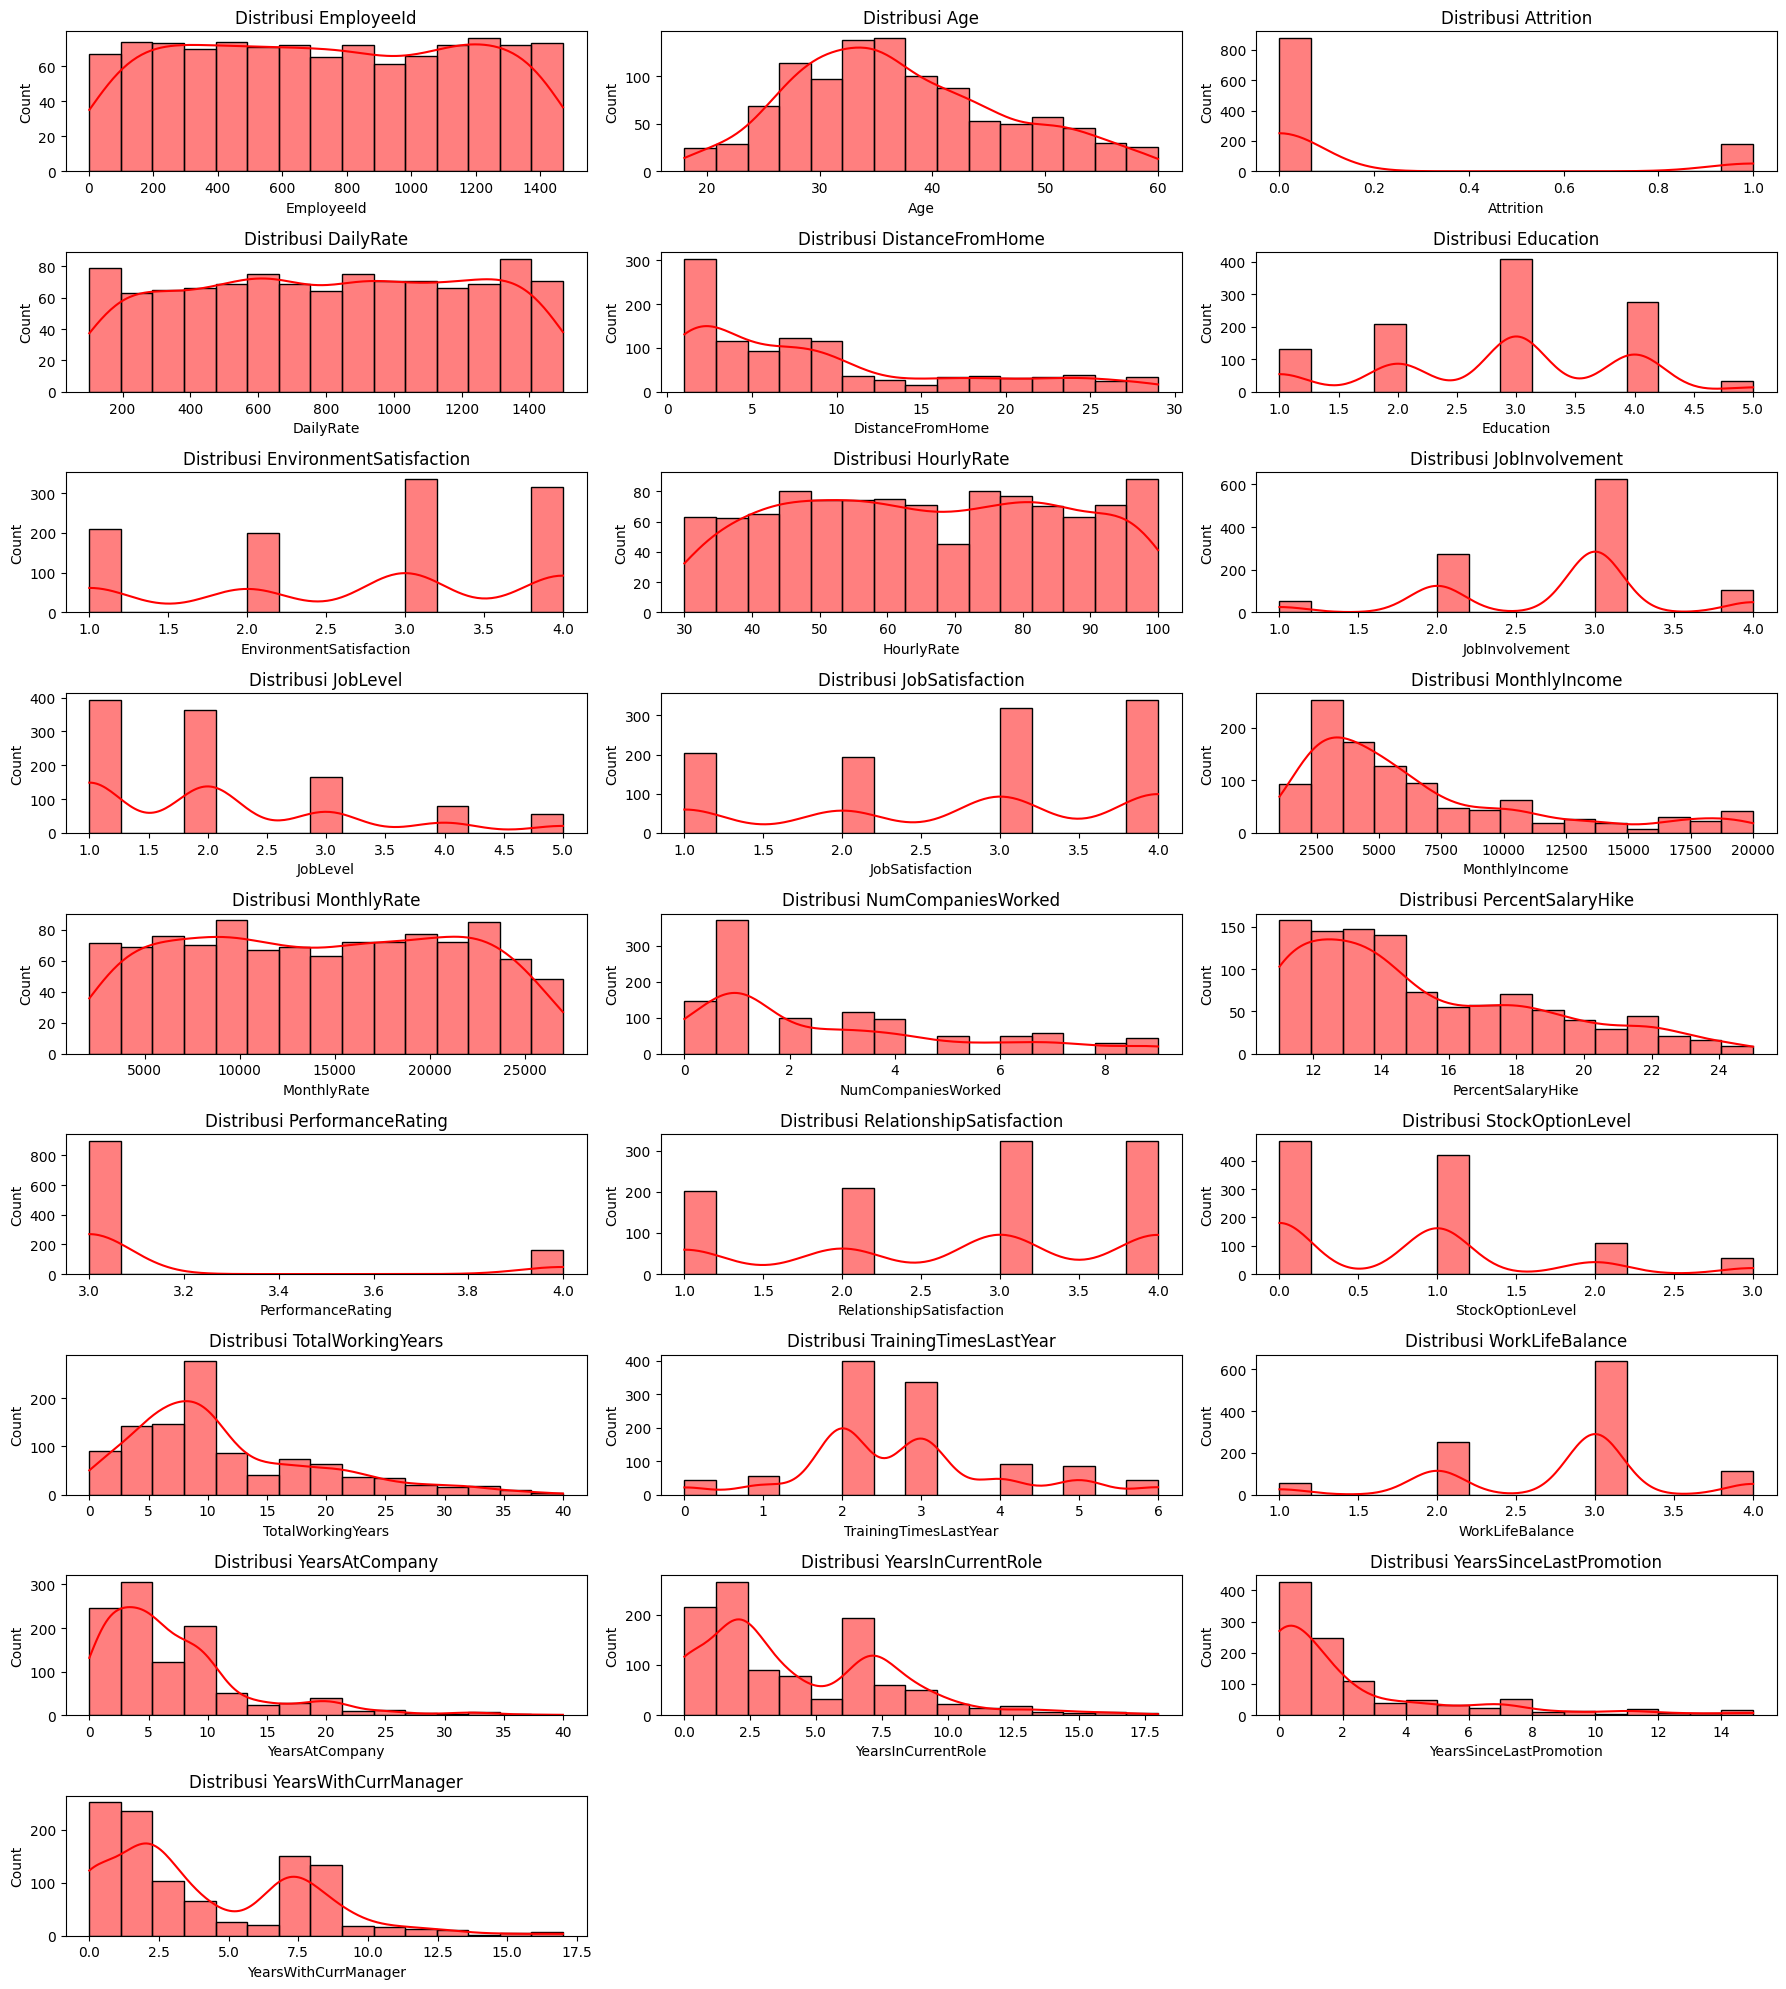

In [11]:
numerical_columns = hr_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(hr_data[col], kde=True, bins=15, color='red')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

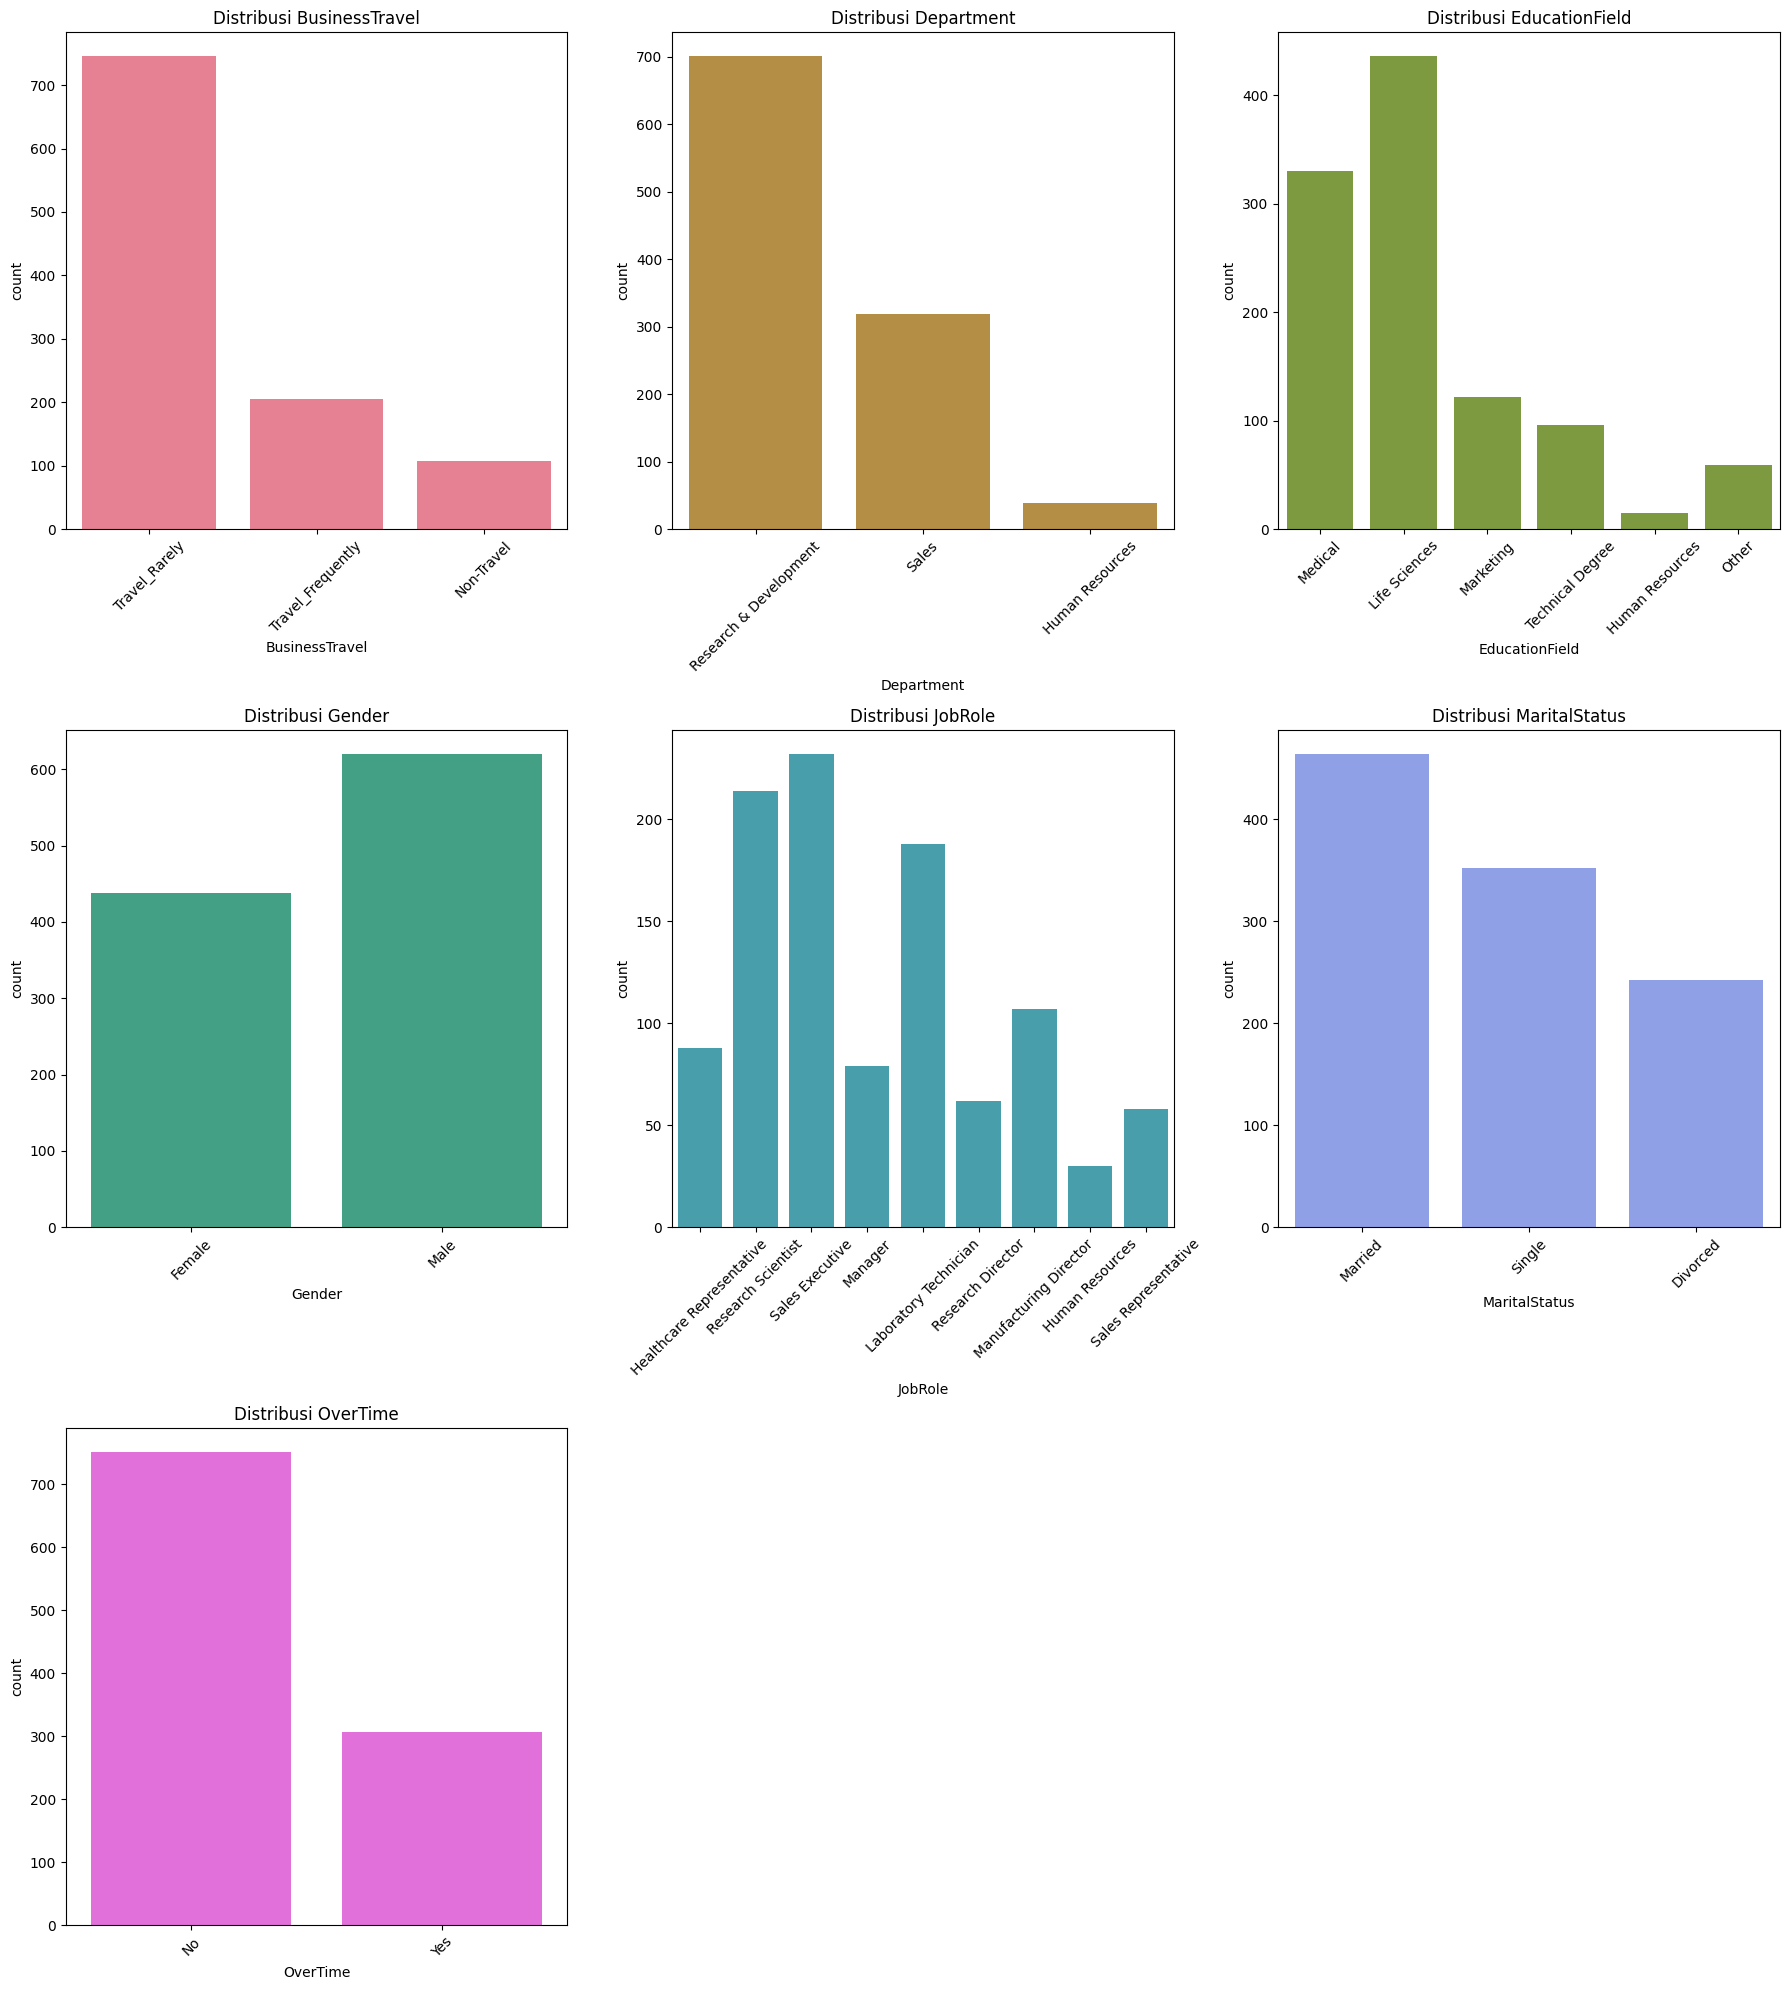

In [12]:
categorical_columns = hr_data.select_dtypes(include=['object']).columns.tolist()
colors = sns.color_palette("husl", len(categorical_columns))

plt.figure(figsize=(18, 20))
for i, (col, color) in enumerate(zip(categorical_columns, colors), 1):
    plt.subplot(len(categorical_columns)//3 + 1, 3, i)
    sns.countplot(data=hr_data, x=col, color=color)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

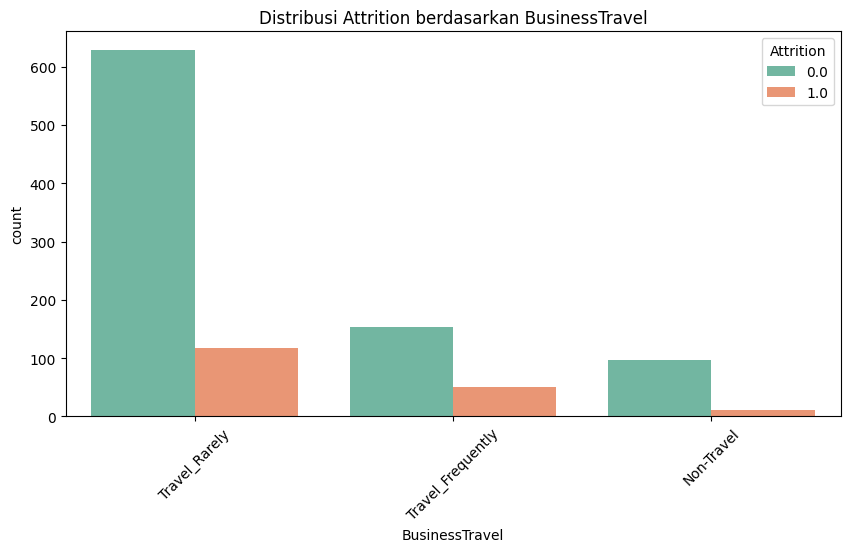

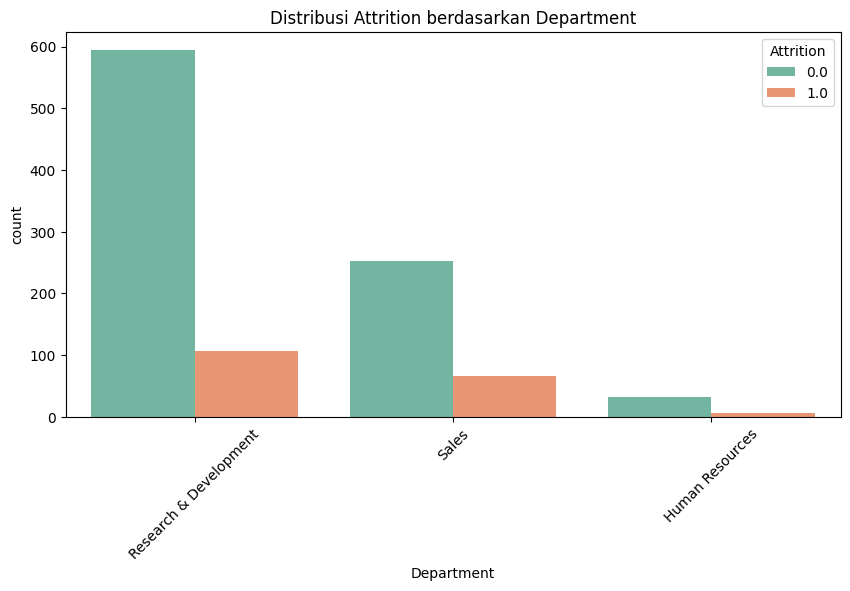

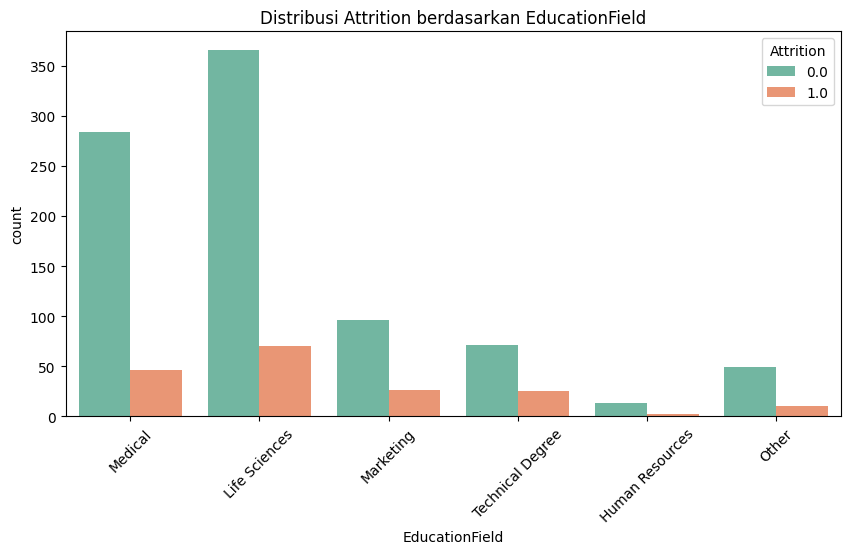

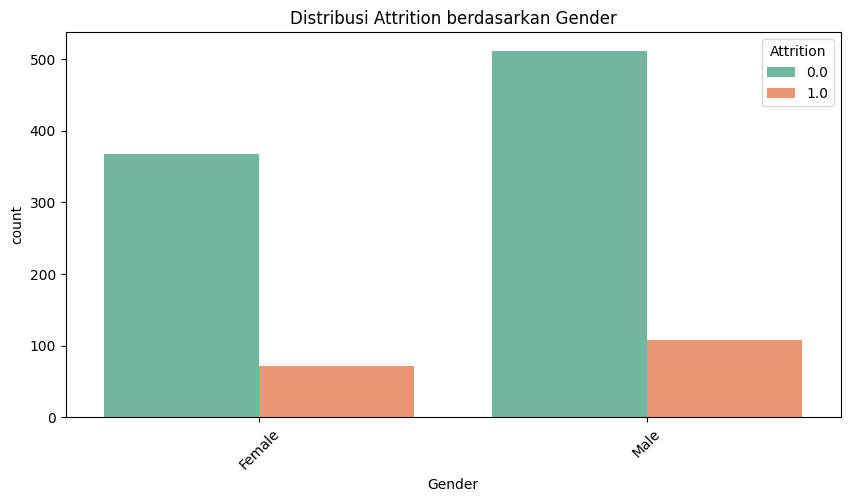

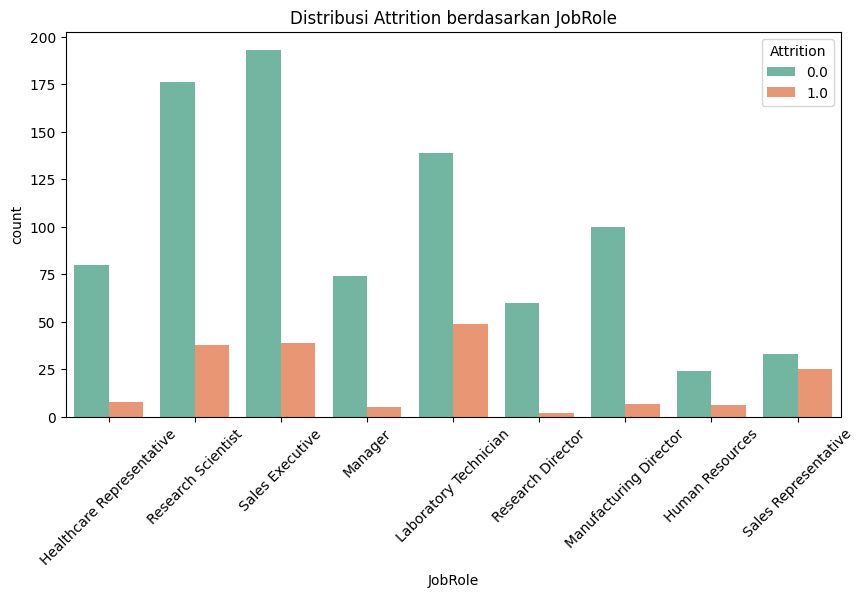

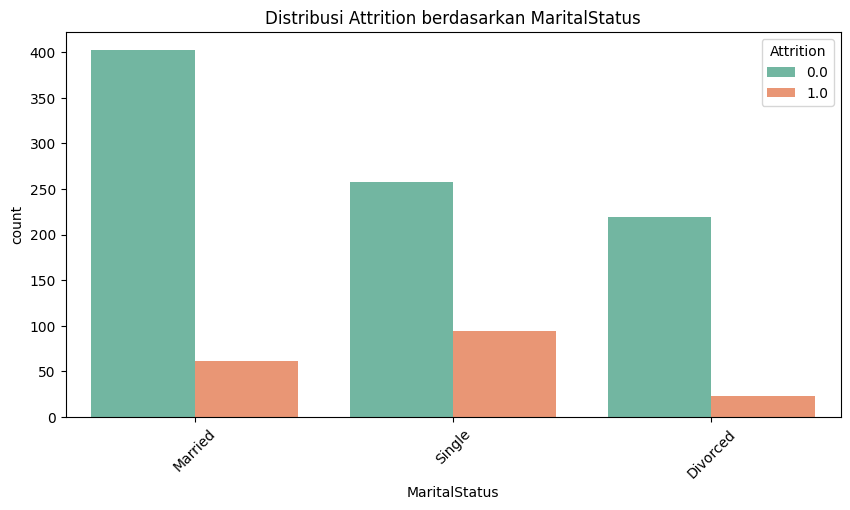

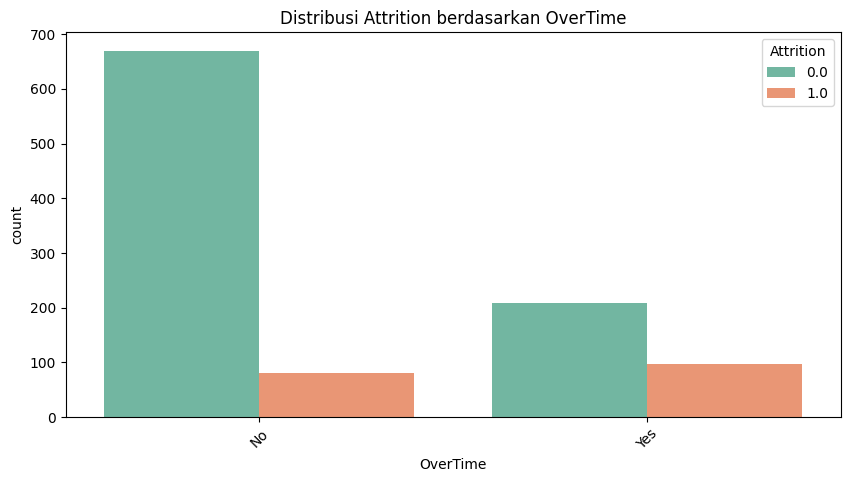

In [13]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=hr_data, x=col, hue='Attrition', palette='Set2')
    plt.title(f'Distribusi Attrition berdasarkan {col}')
    plt.xticks(rotation=45)
    plt.show()

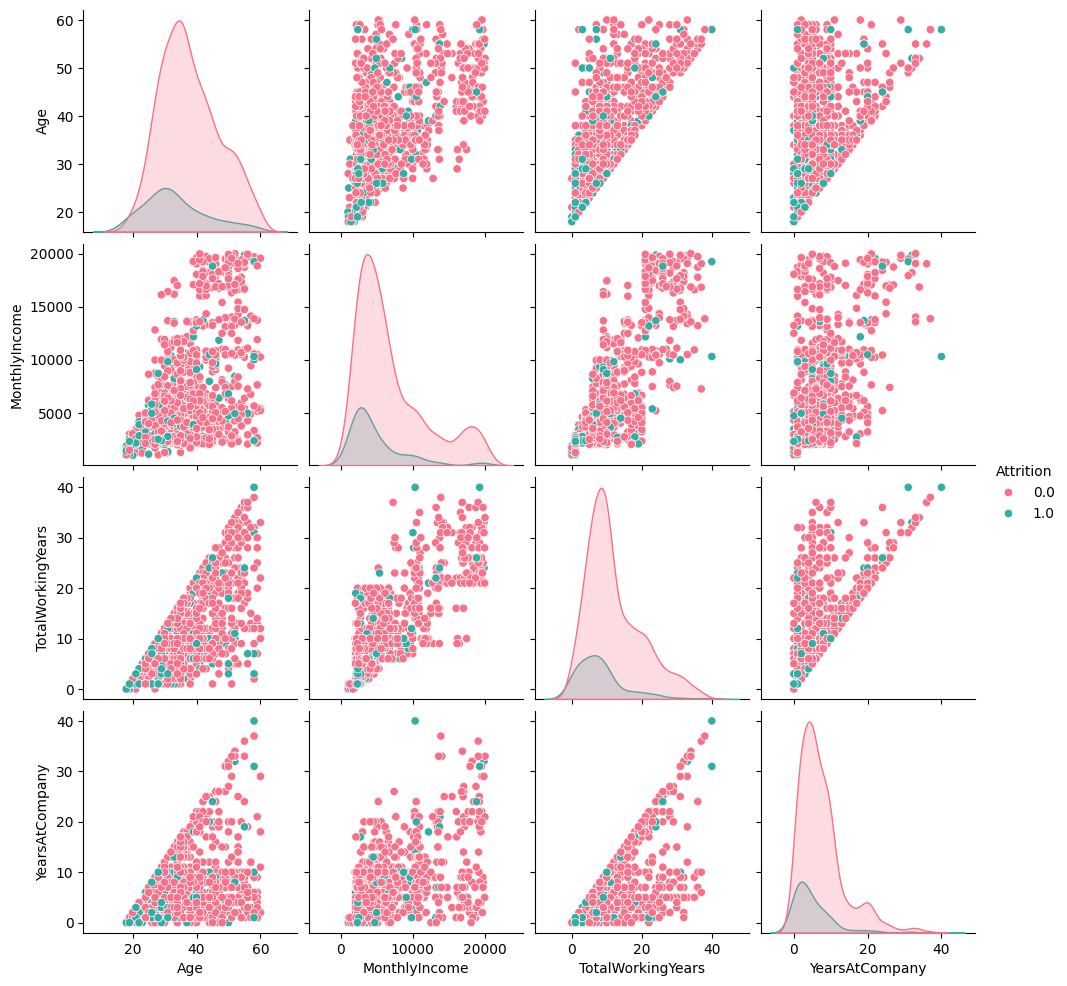

In [14]:
selected_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition']
sns.pairplot(hr_data[selected_features], hue='Attrition', palette='husl')
plt.show()

In [15]:
df_encoded = pd.get_dummies(hr_data, drop_first=True)
corr_matrix = df_encoded.corr()
correlation_attrition = corr_matrix['Attrition'].abs().sort_values(ascending=False)[1:4]

print("Top 3 Factors Most Correlated with Attrition:")
print(correlation_attrition)


Top 3 Factors Most Correlated with Attrition:
OverTime_Yes            0.255856
MaritalStatus_Single    0.184303
TotalWorkingYears       0.177137
Name: Attrition, dtype: float64


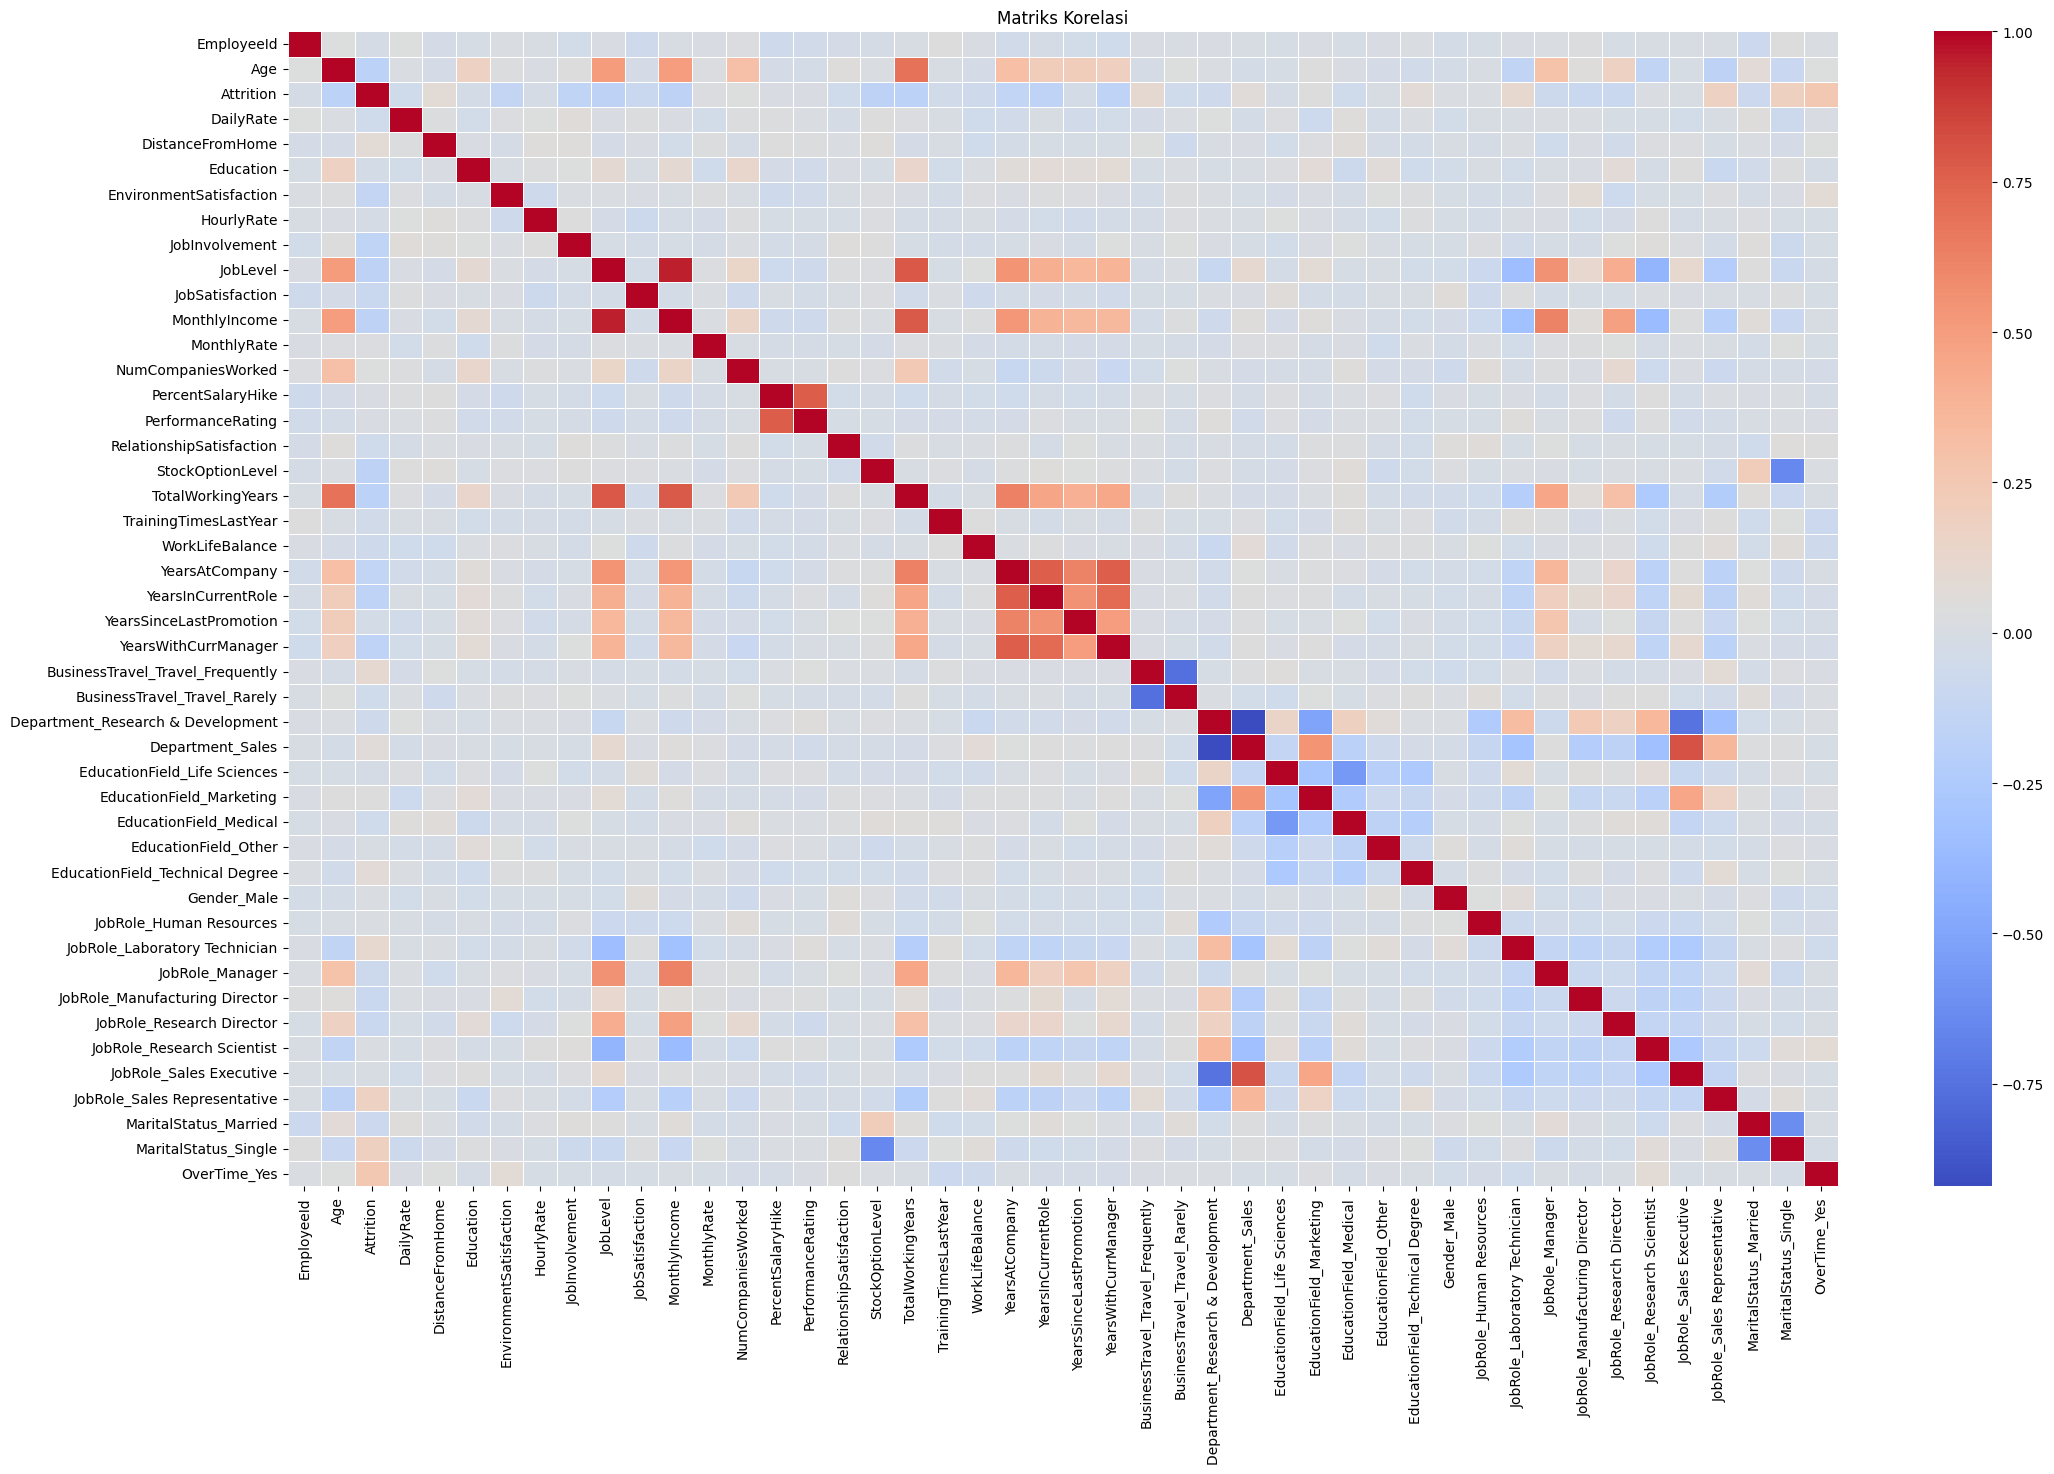

In [16]:
df_encoded = pd.get_dummies(hr_data, drop_first=True)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

<ipython-input-17-688fd359d255>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_factors.values, y=top_10_factors.index, palette='Set2')


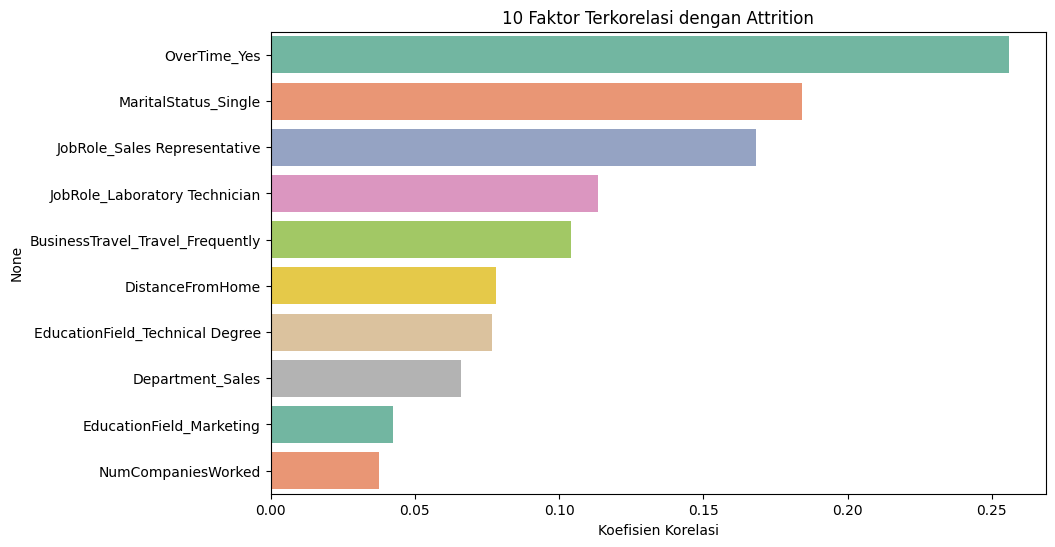

In [17]:
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
top_10_factors = attrition_corr.drop('Attrition').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_factors.values, y=top_10_factors.index, palette='Set2')
plt.title('10 Faktor Terkorelasi dengan Attrition')
plt.xlabel('Koefisien Korelasi')
plt.show()

## Data Preparation / Preprocessing

In [18]:
le = LabelEncoder()
for col in hr_data.select_dtypes(include=['object']).columns:
    hr_data[col] = le.fit_transform(hr_data[col])

df_encoded = pd.get_dummies(hr_data, drop_first=True)


In [19]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [20]:
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [21]:
if X.isnull().sum().sum() > 0:
    raise ValueError("Terdapat nilai NaN dalam X setelah standarisasi!")
if (X == 0).all().sum() > 0:
    raise ValueError("Beberapa fitur dalam X hanya memiliki nilai nol setelah standarisasi!")


In [22]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Modeling

In [24]:
rf_param_grid = {'n_estimators': [200, 500], 'max_depth': [10, 20], 'min_samples_split': [2, 4]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_

In [25]:
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=8, min_samples_leaf=2,
                           min_samples_split=4, n_estimators=500,
                           random_state=42)

In [26]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [27]:
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [28]:
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model), ('svm', svm_model), ('nn', nn_model)], voting='soft')
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_depth=8,
                                                         min_samples_leaf=2,
                                                         min_samples_split=4,
                                                         n_estimators=500,
                                                         random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=(64, 32),
                                            max_iter=500, random_state=42))],
                 voting='soft')

In [29]:
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "SVM": svm_model,
    "Neural Network": nn_model,
    "Voting Classifier": voting_model
}

## Evaluation

In [30]:
def evaluate_model(name, y_test, y_pred, y_proba):
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print(f"Accuracy Score: {accuracy:.4f}")
    return accuracy, auc_roc

In [31]:
results = {}
results["Random Forest"] = evaluate_model("Random Forest", y_test, rf_model.predict(X_test), rf_model.predict_proba(X_test)[:, 1])
results["Gradient Boosting"] = evaluate_model("Gradient Boosting", y_test, gb_model.predict(X_test), gb_model.predict_proba(X_test)[:, 1])
results["SVM"] = evaluate_model("SVM", y_test, svm_model.predict(X_test), svm_model.predict_proba(X_test)[:, 1])
results["Neural Network"] = evaluate_model("Neural Network", y_test, nn_model.predict(X_test), nn_model.predict_proba(X_test)[:, 1])
results["Voting Classifier"] = evaluate_model("Voting Classifier", y_test, voting_model.predict(X_test), voting_model.predict_proba(X_test)[:, 1])



Model: Random Forest
Confusion Matrix:
[[247  17]
 [ 22 242]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       264
         1.0       0.93      0.92      0.93       264

    accuracy                           0.93       528
   macro avg       0.93      0.93      0.93       528
weighted avg       0.93      0.93      0.93       528

AUC-ROC Score: 0.9800
Accuracy Score: 0.9261

Model: Gradient Boosting
Confusion Matrix:
[[249  15]
 [ 20 244]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       264
         1.0       0.94      0.92      0.93       264

    accuracy                           0.93       528
   macro avg       0.93      0.93      0.93       528
weighted avg       0.93      0.93      0.93       528

AUC-ROC Score: 0.9770
Accuracy Score: 0.9337

Model: SVM
Confusion Matrix:
[[230  34]
 [ 11 253]]

Classification Report:
 

In [32]:
best_model, (best_accuracy, best_auc) = max(results.items(), key=lambda x: (x[1][0], x[1][1]))

print(f"\nModel terbaik adalah: {best_model} dengan Accuracy: {best_accuracy:.4f} dan AUC-ROC: {best_auc:.4f}")

joblib.dump(models[best_model], 'best_attrition_model_v6.pkl')
joblib.dump(scaler, 'scaler.pkl')


Model terbaik adalah: Voting Classifier dengan Accuracy: 0.9356 dan AUC-ROC: 0.9859


['scaler.pkl']